---
title: Time Series
tags: [jupyter]
keywords: pandas
summary: "Manipulating time series."
mlType: dataFrame
infoType: pandas
sidebar: pandas_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

This is an overview of various [time series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) manipulations you can do in pandas.  It is from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html).

In [1]:
import sys

sys.path.append("../")

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [4]:
from datetime import datetime
from dateutil import parser

# Padas Options

In [3]:
pd.set_option('max_rows', 20)

# Regular Python

## Using the [datetime](https://docs.python.org/3/library/datetime.html) module

In [5]:
datetime(year=2015, month=7, day=4)
datetime

datetime.datetime

## Using the [dateutil](http://labix.org/python-dateutil) module

In [6]:
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [7]:
date.strftime('%A')

'Saturday'

## Using numpy module

In [8]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [9]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

notice how you can create dates

![](https://drive.google.com/uc?id=1bL_gQyJ4lAaIKRhFClTRcpbrEsAgdSLN)

# Pandas

Pandas build upon all the tools just discussed to provide a ```Timestamp``` object, which combines the ease-of-use of ```datetime``` and ```dateutil``` with the efficient storage and vertoized interface as ```numpy.datetime64```

In [14]:
date= pd.to_datetime('4th of July,2015')
date

Timestamp('2015-07-04 00:00:00')

In [16]:
date.strftime('%A')

'Saturday'

We can do numpy type vectorization as well.

In [17]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Indexing by date

We are using the date as range

In [19]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series(np.arange(4),index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int32

Now we can extract specific things using the indexing patterns

In [21]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int32

In [22]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int32

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For time stamps, Pandas provides the ```Timestamp``` type. As mentioned before, it is essentially a replacement for Python's native ```datetime```, but is based on the more efficient ```numpy.datetime64``` data type. The associated Index structure is ```DatetimeIndex```.
- For time Periods, Pandas provides the ```Period``` type. This encodes a fixed-frequency interval based on ```numpy.datetime64```. The associated index structure is ```PeriodIndex```.
- For time deltas or durations, Pandas provides the ```Timedelta``` type. ```Timedelta``` is a more efficient replacement for Python's native ```datetime.timedelta``` type, and is based on ```numpy.timedelta64```. The associated index structure is ```TimedeltaIndex```.

The most fundamental of these date/time objects are the ```Timestamp``` and ```DatetimeIndex``` objects. While these class objects can be invoked directly, it is more common to use the ```pd.to_datetime()``` function, which can parse a wide variety of formats. Passing a single date to ```pd.to_datetime()``` yields a ```Timestamp```; passing a series of dates by default yields a ```DatetimeIndex```.

In [23]:
dateTypeA = datetime(2015,7,3)
dateTypeB = '4th of July, 2015'
dateTypeC = '2015-Jul-6'
dateTypeD = '07-07-2015'
dateTypeE = '20150708'

dates = pd.to_datetime([dateTypeA,
                       dateTypeB,
                       dateTypeC,
                       dateTypeD,
                       dateTypeE])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

The dype is datetime64[ns] which is the numpy style vectorization.  Now what happens if we want to create a period.  We can use the **to_period()** method.

In [24]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Another way of obtaining this is by subtracting dates

In [27]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Creating Ranges

Pandas makes it easy to identify ranges using the **pd.date_range()** and **pd.timedeltat_range()** method.

In [28]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Note that the default is **day**.  We can specify period and frequency as follows:

In [30]:
period = 8
freqType = 'M'
pd.date_range('2015-07-03', 
              periods=period, 
              freq=freqType)

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

![](https://drive.google.com/uc?id=1C34pbeAq3IRniqrQrkzMLcZnBvZkeGYf)

![](https://drive.google.com/uc?id=1U1TikLLK3JC5uYjcx7-zrp7kmeb2Wezg)

### Example

Lets say we want to increment every 2 hours and 30 min we can do the follow.

In [34]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Time-Shifts

Pandas has two closely related methods for computing time series-specific operations in shifting the data based on dates. **shift()** and **tshift**.  The difference is **shift()** shifts the data while **tshift()** shifts the index date.

In [70]:
dummyDateIndex = pd.date_range('2020-01-01',periods=200,freq='D')
dummyDataValues = np.random.random(len(dummyDateIndex))*64
dummySeries = pd.Series(dummyDataValues,index=dummyDateIndex)

local_max = pd.to_datetime('2020-02-24')
offset = pd.Timedelta(30, 'D')

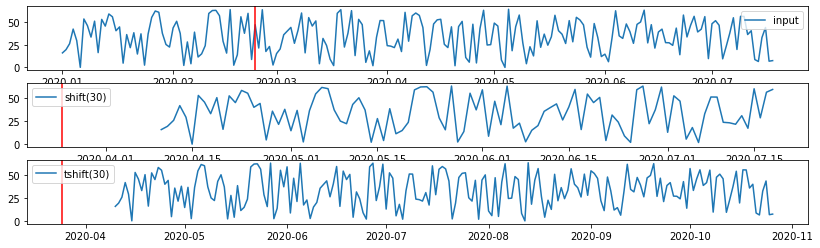

In [74]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot2grid((3,1),(0,0),colspan=1,rowspan=1)
sns.lineplot(data=dummySeries,label='input')
ax1.axvline(local_max,color='red')

ax2 = plt.subplot2grid((3,1),(1,0),colspan=1,rowspan=1)
sns.lineplot(data=dummySeries.shift(100),label='shift(30)')
ax2.axvline(local_max+offset,color='red')

ax3 = plt.subplot2grid((3,1),(2,0),colspan=1,rowspan=1)
sns.lineplot(data=dummySeries.tshift(100),label='tshift(30)')
ax3.axvline(local_max+offset,color='red')


## Rolling Windows

Rolling statistics are a thrid type of time series-specific operation implemented by Pandas.  These can be accomplished via the ```rolling()``` attribute of ```Series``` and ```DataFrame``` objects, which returns a view similar to what we saw with the ```groupby``` operations.  

In [82]:
rolling = dummySeries.rolling(30,center=True)

data = pd.DataFrame({'input':dummySeries,
                    'one-year rolling_mean':rolling.mean(),
                    'one-year rolling_std':rolling.std()})

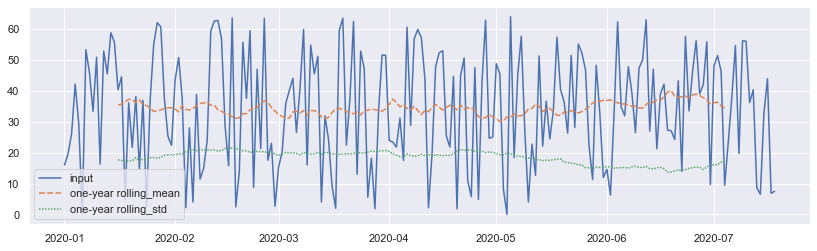

In [86]:
plt.figure(figsize=(14,4))

sns.set()
sns.lineplot(data=data)

plt.show()